# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнила студентка гр. 0382 Рубежова Наталия. Вариант №46

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения
**"Пятичисловая сводка"** сети: <br/>
&emsp; 1. *Размер сети (network size)* - количество акторов в сети.<br/>
&emsp; 2. *Плотность (density)* - доля имеющихся связей по отношению к максимально возможному количеству связей.  (*Функция gden()*) <br/>
&emsp;&emsp;&emsp;Для ориентированных сетей:
&emsp;&emsp;&emsp;$△ = \dfrac{L}{A_2^g} = \dfrac{L}{g(g-1)}$ ,<br/>
&emsp;&emsp;&emsp;Для неориентированных сетей:
&emsp;&emsp;&emsp;$△ = \dfrac{L}{C_2^g} = \dfrac{2L}{g(g-1)}$ , <br/><br/>
&emsp;&emsp;где L - число имеющихся связей сети, g - количество акторов в сети<br/><br/>
&emsp;3. *Компонента (component)* - подгруппа, в которой все акторы связаны друг с другом прямо или косвенно. (*Функция components()*)<br/>
&emsp;4. *Диаметр полной сети (diameter)* - наибольшая длина любого из кратчайших путей между всеми парами узлов. (*Используется функция geodist()*)<br/>
&emsp;5. *Коэффициент кластеризации (transitivity)* - доля закрытых треугольников (триад, где наблюдаются все три связи) по отношению к общему количеству открытых и закрытых теругольников (триад, где наблюдаются либо две, либо все три связи). (*Функция gtrans()*)<br/><br/>

**Силовые алгоритмы укладки сетей(force-directed algorithms)** <br/>&emsp;Итеративные алгоритмы, основанные на уменьшении общей энергии сети, где энергия может быть определена различными способами. <br/><br/>
**Алгоритм Фрюхтермана-Рейндгольда**<br>
&emsp;Вершины - атомные частицы или небесные тела, которые отталкиваются или притягиваются. Действуют силы притяжения и отталкивания: <br>&emsp;&emsp;$F_a(d) = \frac {d^2} {k}$ ; $F_r(d) = \frac {-k^2} {d}$ , где <br/>$d$ - расстояние между вершинами (евклидово); $k = C \sqrt {\frac {area} {\#V}}$ , $area$ - площадь окна, где укладываем граф, $C$ - константа, определяется опытным путем, $\#V$ - количество вершин в сети. <br>&emsp;*Температура*: регулирует смещение вершин. При уменьшении температуры вершины стабилизируются.<br>
**Алгоритм Камада-Каваи**<br>
&emsp;*Идея:* узлы соединены пружинами, нужно настроить пружинную сеть таким образом, чтобы минимальная энергия системы соответствовала минимальной разнице между геометрическим расстоянием и графовым расстоянием между узлами (т. е. найти минимум энергии системы).<br>&emsp;Сила пружины рассчитывается как: <br>&emsp;&emsp;$k_{ij} = \frac {const} {d_{ij}^2}$ , где $d_{ij}$ - кратчайшее расстояние между вершинами $i$ и $j$. <br>&emsp;Энергия пружинной системы:<br>&emsp;&emsp; $E=\sum_{i=1}^{n-1}\sum_{j=i+1}^n \frac {1} {2} k_{ij} (|p_i-p_j| - l_{ij})^2 \ , где |p_i-p_j|$ - норма.<br>&emsp;Задача сводится к нахождению таких точек $(x_i,y_i)$, который минимизируют энергию $E$. <br>&emsp;Фиксируется некоторое значение $ɛ$. На каждом шаге выбирается максимальное значение $\Delta_m = \sqrt {\left(\frac {σE} {σx_m}\right)^2 + \left(\frac {σE} {σy_m}\right)^2}$. <br>&emsp;Далее вычисляются $\delta x$ и $\delta y$ решением системы линейных уравнений, рассчитываются новые $x_m$ и $y_m$, цикл повторяется пока $\Delta_m > ε$.<br>
<br>
*Актор считается **важным** (prominence)*, если связи актора делают его видимым для других участников сети. <br/><br/>

**Центральность(centrality)** - мера, характеризующая актор с большим количеством связей(прямых или косвенных). <br/>&emsp;Обозначение: $C_A(n_i)$ , $i=1,..,g$ .<br/>

**Централизация** - мера, характеризующая группу акторов. <br/>&emsp;Обозначение: $C_A$ . <br/>&emsp;&emsp;&emsp;$C_A = \frac {\sum_{i=1}^g [C_A(n^*)-C_A(n_i)]} {max \sum_{i=1}^g [C_A(n^*)-C_A(n_i)]}$ , $C_A(n^*) = max_i C_A(n_i)$ - максимальное значение центральности.<br/>
<br/><br/>
Центральность **по степени**  - степень каждого актора: $C_D(n_i) = deg(n_i)$ . <br>
*Нормированная центральность по степени: *$C_D'(n_i) = \frac {deg(n_i)} {g-1}$<br>
*Централизация по степени:* $C_D = \frac {\sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} {max \sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} = \frac {\sum_{i=1}^g [C_D(n^*)-C_D(n_i)]} {(g-1)(g-2)}$ .
<br/><br/>
Центральность **по близости** - более важными считаются узлы наиболее близкие к остальным узлам сети.<br/>&emsp;&emsp; $C_C(n_i) = (\sum_{i=1}^g d(n_i, n_j))^-1$ , $d(n_i, n_j)$ - расстояние между двумя узлами.<br>
*Нормированная центральность по близости:* $C_c'(n_i) = \frac {g-1} {\sum_{i=1}^g d(n_i, n_j)} = (g-1)C_C(n_i)$ .<br>
*Централизация по близости:*$C_C = \frac {\sum_{i=1}^g [C_C(n^*)-C_C(n_i)]} {(g-1)(g-2)/(2g-3)}$ .
<br/><br/>
Центральность **по посредничеству** - характеризует насколько важную роль данный узел играет на пути "между" парами узлов в сети, в том смысле, что пути между другими узлыми должны проходить через данный узел $n_i$ : <br/>&emsp;&emsp;$C_B(n_i) = \frac {\sum_{j<k} g_{jk}(n_i)} {g_{jk}} , n_i \ne j,k$ . $g_{ij}(n_i)$ - количество геодезичских расстояний (кратчайшие пути) между узлами $j$ и $k$, который включают узел $i$, $g_{jk}$ - геодезическое расстояние между $j$ и $k$.<br>
*Нормированная центральность по посредничеству:* $C_B'(n_i) = \frac {C_B(n_i)} {C_2^{g-1}}$ .<br>
*Централизация по посредничеству:* $C_B = \frac {2\sum_{i=1}^g [C_B(n^*)-C_B(n_i)]} {(g-1)^2(g-2)} = \frac {\sum_{i=1}^g [C_B(n^*)-C_B(n_i)]} {g-1}$ .
<br><br>
Центральность **по информации** - обобщает все меры центральности, учитываются все комбинированные пути от одного актора к другому: <br/>&emsp;&emsp;$C_I(n_i)=\frac {1} {c_{ii}+(T-2R)/g}$ , $T=\sum_{i=1}^g c_{ii} = tr C$ , $R = \sum_{j=1}^g c_{ij}$ , <br> 1)Cоздаем матрицу $A$ размера $g\times g$ с элементами $\{a_{ij}\}$ : $a_{ij} = 1\ +$ <сумма значений всех линий, инцидентных с $n_i$>. <br/>&emsp;где $a_{ij} = \left\{ \begin{array}{cl}1 & \text {если узлы $n_i$ и $n_j$ не инцидентны}\\ 1-x_{ij} & \text {если узлы $n_i$ и $n_j$ инцидентны} \end{array} \right.$ , <br><br>2)Создаем матрицу $C=A^{-1}$ - матрица с элементами $\{c_{ij}\}$ . <br>
Нормированная централизация по информации: $C_I'=\frac {C_I(n_i)} {\sum_i C_I(n_i)}$ .<br>
Централизацию по информации можно вычислить как дисперсию индексов информации актора: $S_I^2 = \frac {1} {g} \sum_{i=1}^g (C_I'(n_i) - \overline {C_I})^2$ , $\overline {C_I} = \frac {1} {g} \sum_i C_I(n_i)$ . <br>
<br><br>
**Престиж** - мера, характеризующая актор с наибольшим числом входящих связей. <br>&emsp;Обозначение: $P_A(n_i)\ , i=1,..,g$ , A-мера(по степени/по близости).<br>
<br>
Престиж *по степени* - входящая степень каждого узла: <br/>&emsp;&emsp;$P_D(n_i) = d_I(n_i) = x_{+i}\ , d_I$ - входящие (Input). <br>
Нормированный престиж по степени: $P_D' = \frac {X_{+i}} {g-1}$ .<br> 
<br>

Престиж *по близости* - характеризует, насколько все акторы близки к заданному по расстоянию до него: <br/>&emsp;&emsp;$P_P(n_i) = \frac {\#I_i/(g-1)} {\sum_{j: n_j \in I_i} d(n_j, n_i) / \#I_i}~$,$~d(n_j, n_i)$ - растояние пути между двумя узлами.<br>
*Область влияния актора $I_i$* - множество акторов прямо или косвенно связанных с указанным актором (связи входящие в $i$-ый актор).<br>






## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы
1. Из файла florentine_marital.csv (т.к. чётный вариант) была извлечена социоматрица с помощью соответствующей функции read.csv(). Полученная социоматрица выведена на экран.

In [ ]:
maritalDF <- read.csv("florentine_marital.csv", comment="#");
maritalDF;

Вывод полученной социоматрицы на экран:

| Acciaiuoli | Albizzi | Barbadori | Bischeri | Castellani | Ginori | Guadagni | Lamberteschi | Medici |  Pazzi | Peruzzi |  Pucci | Ridolfi | Salviati | Strozzi | Tornabuoni |   |
|-----------:|--------:|----------:|---------:|-----------:|-------:|---------:|-------------:|-------:|-------:|--------:|-------:|--------:|---------:|--------:|-----------:|--:|
|     \<int> |  \<int> |    \<int> |   \<int> |     \<int> | \<int> |   \<int> |       \<int> | \<int> | \<int> |  \<int> | \<int> |  \<int> |   \<int> |  \<int> |     \<int> |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        0 |          0 |      1 |        1 |            0 |      1 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        0 |          1 |      0 |        0 |            0 |      1 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      0 |      0 |       1 |      0 |       0 |        0 |       1 |          0 |   |
|          0 |       0 |         1 |        0 |          0 |      0 |        0 |            0 |      0 |      0 |       1 |      0 |       0 |        0 |       1 |          0 |   |
|          0 |       1 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       1 |         0 |        1 |          0 |      0 |        0 |            1 |      0 |      0 |       0 |      0 |       0 |        0 |       0 |          1 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      0 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          1 |       1 |         1 |        0 |          0 |      0 |        0 |            0 |      0 |      0 |       0 |      0 |       1 |        1 |       0 |          1 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |      0 |       0 |      0 |       0 |        1 |       0 |          0 |   |
|          0 |       0 |         0 |        1 |          1 |      0 |        0 |            0 |      0 |      0 |       0 |      0 |       0 |        0 |       1 |          0 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |      0 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |      0 |       0 |      0 |       0 |        0 |       1 |          1 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |      1 |       0 |      0 |       0 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        1 |          1 |      0 |        0 |            0 |      0 |      0 |       1 |      0 |       1 |        0 |       0 |          0 |   |
|          0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      1 |      0 |       0 |      0 |       1 |        0 |       0 |          0 |   |

2. Социоматрица была преобразована сначала в матрицу *igraph*, затем в граф *igraph*, для того, чтобы воспользоваться функцией преобразования графа *igraph* в список рёбер с помощью функции *as_edgelist()* из библиотеки *igraph*. Затем первые 5 элементов полученного списка рёбер были выведены на экран.

In [ ]:
library(igraph);
maritalMatr <- as.matrix(maritalDF);
gr <- graph_from_adjacency_matrix(maritalMatr, mode='undirected');
edgeList <- as_edgelist(gr, names=TRUE);
head(edgeList, 5);

*Вывод первых 5 элементов полученного списка рёбер edgeList на экран:*


|            |            |
|-----------:|-----------:|
| Acciaiuoli |     Medici |
|    Albizzi |     Ginori |
|    Albizzi |   Guadagni |
|    Albizzi |     Medici |
|  Barbadori | Castellani |

3. Поскольку имена столбцов социоматрицы уже были присвоены во время чтения из *.csv* файла с помощью функции *read.csv()*, согласно заданию были присвоены имена строкам социоматрицы. </br> Обращение к именам строк и стобцов производится с помощью функций *rownames()* и *colnames()* соответственно.

In [ ]:
# были добавлены наименования строк для лучшей "просматриваемости" смежных узлов сети(ячеек data frame)
rownames(maritalDF) <- colnames(maritalDF);
maritalDF;

Полученная социоматрица с именами строк и стобцов:

|              |  Acciaiuoli | Albizzi | Barbadori | Bischeri | Castellani | Ginori | Guadagni | Lamberteschi | Medici | Pazzi | Peruzzi | Pucci | Ridolfi | Salviati | Strozzi | Tornabuoni |
|-------------:|------------:|--------:|----------:|---------:|-----------:|-------:|---------:|-------------:|-------:|------:|--------:|------:|--------:|---------:|--------:|-----------:|
|              | \<int> |   \<int> |     \<int> |    \<int> |      \<int> |\<int> |    \<int> |        \<int> |  \<int> | \<int> |   \<int> | \<int> |   \<int> |    \<int> |   \<int> |      \<int> |
|  Acciaiuoli  |           0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|    Albizzi   |           0 |       0 |         0 |        0 |          0 |      1 |        1 |            0 |      1 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|   Barbadori  |           0 |       0 |         0 |        0 |          1 |      0 |        0 |            0 |      1 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|   Bischeri   |           0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      0 |     0 |       1 |     0 |       0 |        0 |       1 |          0 |
|  Castellani  |           0 |       0 |         1 |        0 |          0 |      0 |        0 |            0 |      0 |     0 |       1 |     0 |       0 |        0 |       1 |          0 |
|    Ginori    |           0 |       1 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|   Guadagni   |           0 |       1 |         0 |        1 |          0 |      0 |        0 |            1 |      0 |     0 |       0 |     0 |       0 |        0 |       0 |          1 |
| Lamberteschi |           0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      0 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|    Medici    |           1 |       1 |         1 |        0 |          0 |      0 |        0 |            0 |      0 |     0 |       0 |     0 |       1 |        1 |       0 |          1 |
|     Pazzi    |           0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |     0 |       0 |     0 |       0 |        1 |       0 |          0 |
|    Peruzzi   |           0 |       0 |         0 |        1 |          1 |      0 |        0 |            0 |      0 |     0 |       0 |     0 |       0 |        0 |       1 |          0 |
|     Pucci    |           0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      0 |     0 |       0 |     0 |       0 |        0 |       0 |          0 |
|    Ridolfi   |           0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |     0 |       0 |     0 |       0 |        0 |       1 |          1 |
|   Salviati   |           0 |       0 |         0 |        0 |          0 |      0 |        0 |            0 |      1 |     1 |       0 |     0 |       0 |        0 |       0 |          0 |
|    Strozzi   |           0 |       0 |         0 |        1 |          1 |      0 |        0 |            0 |      0 |     0 |       1 |     0 |       1 |        0 |       0 |          0 |
|  Tornabuoni  |           0 |       0 |         0 |        0 |          0 |      0 |        1 |            0 |      1 |     0 |       0 |     0 |       1 |        0 |       0 |          0 |

4. По полученной социоматрице была построена ненаправленная сеть с помощью функции *network()* из библиотеки *statnet*. <br/> <br/>
Параметры, передаваемые в функцию *network()*:
+ *maritalMatr* - матрица, по которой нужно строить сеть 
+ *matrix.type="adjacency"* - тип передаваемой матрицы(adjacency/edgelist/incidence/NULL), в данном случае - *матрица смежности*
+ *directed=FALSE* - указание строить направленную(TRUE) или ненаправленную(FALSE) сеть

In [ ]:
library(statnet);
undirectNet <- network(maritalMatr, matrix.type="adjacency", directed=FALSE);
plot(undirectNet, label=colnames(maritalDF) )

*Построенная ненаправленная сеть:* <br/>
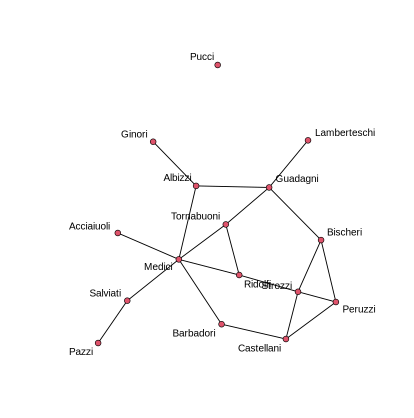

5. Сеть была отображена с помощью алгоритмов укладки Фрюхтермана-Рейнгольда и Камада-Каваи. </br> **Различия между алгоритмами и укладками:**

**Алгоритм Фрюхтермана-Рейндгольда**<br>
&emsp;Вершины - атомные частицы или небесные тела, которые отталкиваются или притягиваются. Действуют силы притяжения и отталкивания: <br>&emsp;&emsp;$F_a(d) = \frac {d^2} {k}$ ; $F_r(d) = \frac {-k^2} {d}$ , где <br/>$d$ - расстояние между вершинами (евклидово); $k = C \sqrt {\frac {area} {\#V}}$ , $area$ - площадь окна, где укладываем граф, $C$ - константа, определяется опытным путем, $\#V$ - количество вершин в сети. <br>&emsp;*Температура*: регулирует смещение вершин. При уменьшении температуры вершины стабилизируются.<br><br>
**Алгоритм Камада-Каваи**<br>
&emsp;*Идея:* узлы соединены пружинами, нужно настроить пружинную сеть таким образом, чтобы минимальная энергия системы соответствовала минимальной разнице между геометрическим расстоянием и графовым расстоянием между узлами (т. е. найти минимум энергии системы).<br>&emsp;Сила пружины рассчитывается как: <br>&emsp;&emsp;$k_{ij} = \frac {const} {d_{ij}^2}$ , где $d_{ij}$ - кратчайшее расстояние между вершинами $i$ и $j$. <br>&emsp;Энергия пружинной системы:<br>&emsp;&emsp; $E=\sum_{i=1}^{n-1}\sum_{j=i+1}^n \frac {1} {2} k_{ij} (|p_i-p_j| - l_{ij})^2 \ , где |p_i-p_j|$ - норма.<br>&emsp;Задача сводится к нахождению таких точек $(x_i,y_i)$, который минимизируют энергию $E$. <br>&emsp;Фиксируется некоторое значение $ɛ$. На каждом шаге выбирается максимальное значение $\Delta_m = \sqrt {\left(\frac {σE} {σx_m}\right)^2 + \left(\frac {σE} {σy_m}\right)^2}$. <br>&emsp;Далее вычисляются $\delta x$ и $\delta y$ решением системы линейных уравнений, рассчитываются новые $x_m$ и $y_m$, цикл повторяется пока $\Delta_m > ε$.<br>

In [ ]:
#gr - неориентированный граф сети(получили в пред. пунктах с помощью graph_from_adjacency_matrix() из библиотеки igraph)
lFR <- layout.fruchterman.reingold(gr);
lKK <- layout.kamada.kawai(gr);
plot(gr, layout = lFR, main = "Fruchterman-Reingold graph layout algorithm");
plot(gr, layout = lKK, main = "Kamada Kawai graph layout algorithm");


*Отображение укладки сети с помощью алгоритмов Фрюхтермана-Рейнгольда и Камада-Каваи:*<br>
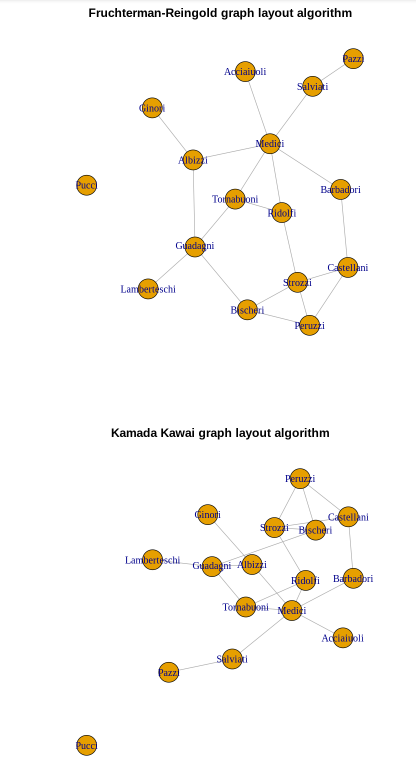

6. Была выведена *\"описательная сводка\"* сети.

In [ ]:
summary(undirectNet);

Вывод "описательной" сводки на экран: <br>

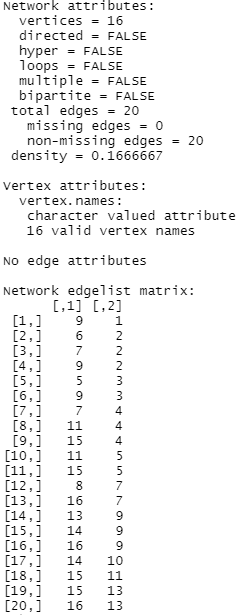

7. Далее была вычислена *\"пятичисловая сводка\"* сети: </br>  &emsp;*(a)* ***Размер сети:***&emsp;**16** (количество акторов в сети);</br> 

&emsp;&emsp;&emsp;&nbsp;*(b)* ***Плотность сети*** *по формуле:*<br/>&emsp;&emsp;&emsp;&nbsp;$△ = \dfrac{L}{C_2^g} = \dfrac{2L}{g(g-1)}=\dfrac{2*20}{16*15} \approx 0.1667$ <br/>&emsp;&emsp;&emsp;&nbsp;Вычисленное функцией *gden()* значение: 0.1666667. <br/>&emsp;&emsp;&emsp;&nbsp;**Вывод**. "Теоретическая" плотность сети совпадает с вычисленным функцией *gden()* значением с точностью до округления. Значит, плотность сети вручную посчитана верно: **$\triangle$ = 0.1667**.</br> 

&emsp;&emsp;&emsp;&nbsp;*(c)* ***Число компонент в сети*** *по графику*: &emsp;2.<br/>
&emsp;&emsp;&emsp;&nbsp;Вычисленное функцией *components()* значение: &emsp;2.<br/> &emsp;&emsp;&emsp;&nbsp;**Вывод**. Число компонент по графику совпало со значением, вычисленным функцией *components()*. Следовательно, "догадки" подтверждены. **Число компонент - 2**.</br> 

&emsp;&emsp;&emsp;&nbsp;*(d)* ***Диаметр сети*** . <br/>&emsp;&emsp;&emsp;&nbsp;Вычислим матрицу геодезических расстояний с помощью функции *geodist()* и найдем среди ее элементов максимальный, отличный от бесконечности(когда пути нет). Получили **diameter = 5**.<br/>&emsp;&emsp;&emsp;&nbsp;**Вывод**. Таким образом, наибольшее из кратчайших расстояний между всеми парами узлов равно 5. Пример: расстояние от Lamberteschi до Pazzi.</br> 

&emsp;&emsp;&emsp;&nbsp;*(e)* ***Коэффициент кластеризации***. <br/>&emsp;&emsp;&emsp;&nbsp;Значение, вычисленное функцией *gtrans()*: &emsp;0.1914894<br/>&emsp;&emsp;&emsp;&nbsp;**Вывод.**<br/>&emsp;&emsp;&emsp;&nbsp; Таким образом, коэффициент кластеризации, т.е. отношение закрытых треугольников по отношению к общему  количеству открытых и закрытых треугольников составляет 0.1914894 .

In [ ]:
library(sna);
cat("'Five Number' summary about network:\n");
cat("Network's size: ", network.size(undirectNet), '\n');
cat("Network's density: ", gden(undirectNet, mode='graph'), '\n');
cat("Number of network's components: ", components(undirectNet), '\n');
lst <- geodist(undirectNet); # geodist возвращает список, включающий в себя: counts(матрица количества кратч.расстояний между каждой парой вершин), gdist(матрица кратч.расстояний), ...
# найдем максимальное из кратчайших путей
diam <- max(lst$gdist[lst$gdist != Inf]);
cat("Network's diameter: ", diam, '\n');
cat("Network's transitivity: ", gtrans(undirectNet), '\n');

Вывод "пятичисловой сводки" на экран: <br>

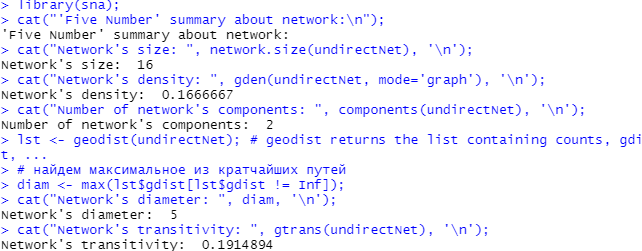

8. Была вычислена средняя степень узлов и дисперсия. <br/>**Вывод**<br/>  С помощью функции *degree()* из пакета *sna* были вычислены степени узлов. А также искомые значения: <br/> &emsp;*Средняя степень узлов:* &emsp;**2.5**<br/>&emsp;*Дисперсия степеней узлов:*&emsp;**2.125**

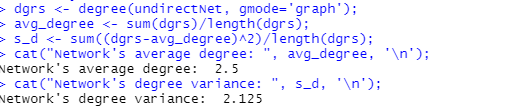

In [ ]:
library(sna);
dgrs <- degree(undirectNet, gmode='graph');
avg_degree <- sum(dgrs)/length(dgrs);
s_d <- sum((dgrs-avg_degree)^2)/length(dgrs);
cat("Network's average degree: ", avg_degree, '\n');
cat("Network's degree variance: ", s_d, '\n');

9. Заполненная таблица для различных мер центральности (*для неизолированных вершин*). **Вывод**



In [ ]:
# из исходного data.frame "извлечем" ненулевые строки и столбцы 
notIsolatedDF <- maritalDF[which(rowSums(maritalDF)!=0), which(colSums(maritalDF)!=0)];
notIsolatedVertices <- colnames(notIsolatedDF);

notIsolatedMatr <- as.matrix(notIsolatedDF);
notIsolatedGr <- graph_from_adjacency_matrix(notIsolatedMatr, mode='undirected');
notIsolatedNet <- network(notIsolatedMatr, matrix.type = "adjacency", directed = FALSE);

resultTable <- data.frame(n_i = notIsolatedVertices);
nodesNumber <- ncol(notIsolatedDF);

# центральность по степени
dCentr <- centr_degree(notIsolatedGr, mode = "all", normalized = TRUE);
# центральность по близости
cCentr <- centr_clo(notIsolatedGr, normalized = TRUE);
# центральность по посредничеству
bCentr <- centr_betw(notIsolatedGr, normalized = TRUE);
# центральность по информации
iCentr <- infocent(notIsolatedNet, gmode = "graph");
# нормированные центральности собираем в resultTable
resultTable <- cbind(resultTable, 
                     centr_d = dCentr$res / (nodesNumber - 1), 
                     centr_c = cCentr$res, betw = bCentr$res * 2 / ((nodesNumber - 1) * (nodesNumber - 2)), 
                     centr_i = iCentr / sum(iCentr));
resultTable;

Полученная таблица:

|        $n_i$      | $C'_{D}(n_i)$ | $C'_{C}(n_i)$ | $C'_{B}(n_i)$ | $C'_{I}(n_i)$ |
|-------------:|--------------:|---------------|--------------|-------------|
| Acciaiuoli   | 0.07142857    | 0.3684211     | 0.00000000   | 0.04943215  |
| Albizzi      | 0.21428571    | 0.4827586     | 0.21245421   | 0.07408484  |
| Barbadori    | 0.14285714    | 0.4375000     | 0.09340659   | 0.06816655  |
| Bischeri     | 0.21428571    | 0.4000000     | 0.10439560   | 0.07427531  |
| Castellani   | 0.21428571    | 0.3888889     | 0.05494505   | 0.07093098  |
| Ginori       | 0.07142857    | 0.3333333     | 0.00000000   | 0.04309479  |
| Guadagni     | 0.28571429    | 0.4666667     | 0.25457875   | 0.08190476  |
| Lamberteschi | 0.07142857    | 0.3255814     | 0.00000000   | 0.04562892  |
| Medici       | 0.42857143    | 0.5600000     | 0.52197802   | 0.09502877  |
| Pazzi        | 0.07142857    | 0.2857143     | 0.00000000   | 0.03515798  |
| Peruzzi      | 0.21428571    | 0.3684211     | 0.02197802   | 0.06953773  |
| Ridolfi      | 0.21428571    | 0.5000000     | 0.11355311   | 0.08040678  |
| Salviati     | 0.14285714    | 0.3888889     | 0.14285714   | 0.05337198  |
| Strozzi      | 0.28571429    | 0.4375000     | 0.10256410   | 0.07841151  |
| Tornabuoni   | 0.21428571    | 0.4827586     | 0.09157509   | 0.08056694  |

**Вывод**. По результатам таблицы можно заключить, что наиболее важным актором является Medici.

10. Было вычислено значение централизации для каждой меры.


In [ ]:
centralizationDF <- data.frame(measure = c("by degree", "by closeness", "by betweeness", "by information"), 
                               value = c(dCentr$centralization, cCentr$centralization, bCentr$centralization, sum((iCentr / sum(iCentr) - sum(iCentr) / nodesNumber)^2) / nodesNumber));
centralizationDF

| measure        | value     |
|----------------|-----------|
| by degree      | 0.2380952 |
| by closeness   | 0.3224523 |
| by betweeness  | 0.4368132 |
| by information | 0.4626727 |

**Вывод**. По полученным значениям можно заключить, что наибольшая централизация сети - по информации.

11. Были выявлены следующие точки сочленения и мосты сети: <br/>*Точки сочленения:* Salviati, Guadagni, Albizzi, Medichi. <br/> *Мосты:* Medichi-Acciaiuoli, Medichi-Salviati, Lamberteschi-Guadagni, Ginori-Albizzi,
Salviati-Pazzi. <br/>&emsp;Догадки подтверждены с помощью функций *bridges()* и *articulation_points()* . Далее, был построен график сети, на котором выделены точки сочленения и мосты. Точки сочленения окрашены в красный, мосты - в зеленый.

In [ ]:
points <- articulation_points(gr)
bridges <- bridges(gr)

# точки сочленения окрашены в красный
vertexColors <- c(1:vcount(gr))
vertexColors <- sapply(vertexColors, function(x) {
  ifelse(V(gr)[x] %in% points, "red", "yellow")
})

# мосты окрашены в зеленый
edgeColors <- c(1:ecount(gr))
edgeColors <- sapply(edgeColors, function(x) {
  ifelse(E(gr) %in% bridges, "green", "blue")
})
plot(gr, vertex.color = vertexColors, edge.color = edgeColors)

"Окрашенная" сеть: <br/>
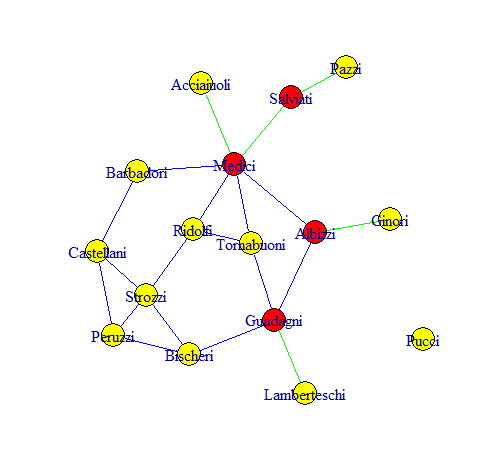

12. Были выполнены пп.2-8 для направленной сети из файла *krackhardt_friendship.csv*.

пп2. Социоматрица преобразована в список рёбер. Выведены первые 5 элементов списка рёбер для сети из файла *krackhardt_friendship.csv.*

In [ ]:
friendDF <- read.csv("krackhardt_friendship.csv", header=FALSE, comment="#");
library(igraph);
friendMatr <- as.matrix(friendDF);
friendGr <- graph_from_adjacency_matrix(friendMatr, mode='directed');
friendEdgeList <- as_edgelist(friendGr, names=TRUE);
head(friendEdgeList, 5);

Вывод 5 элементов списка рёбер: <br>

|      | [,1] | [,2] |
|------|------|------|
| [1,] | V1   | V2   |
| [2,] | V1   | V4   |
| [3,] | V1   | V8   |
| [4,] | V1   | V12  |
| [5,] | V1   | V16  |

пп3. Поскольку имена столбцов социоматрицы уже были присвоены во время чтения из *.csv* файла с помощью функции *read.csv()*, согласно заданию были присвоены имена строкам социоматрицы. </br> Обращение к именам строк и стобцов производится с помощью функций *rownames()* и *colnames()* соответственно.

In [ ]:
# были добавлены наименования строк для лучшей "просматриваемости" смежных узлов сети(ячеек data frame)
rownames(friendDF) <- colnames(friendDF);
friendDF;

Вывод социоматрицы:

|     | V1 | V2 | V3 | V4 | V5 | V6 | V7 | V8 | V9 | V10 | V11 | V12 | V13 | V14 | V15 | V16 | V17 | V18 | V19 | V20 | V21 |
|-----|----|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| V1  | 0  | 1  | 0  | 1  | 0  | 0  | 0  | 1  | 0  | 0   | 0   | 1   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   |
| V2  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 1   |
| V3  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   |
| V4  | 1  | 1  | 0  | 0  | 0  | 0  | 0  | 1  | 0  | 0   | 0   | 1   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   |
| V5  | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 0   | 1   | 0   | 0   | 1   | 0   | 0   | 1   | 0   | 1   | 0   | 1   |
| V6  | 0  | 1  | 0  | 0  | 0  | 0  | 1  | 0  | 1  | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 1   |
| V7  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V8  | 0  | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V9  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V10 | 0  | 0  | 1  | 0  | 1  | 0  | 0  | 1  | 1  | 0   | 0   | 1   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 1   | 0   |
| V11 | 1  | 1  | 1  | 1  | 1  | 0  | 0  | 1  | 1  | 0   | 0   | 1   | 1   | 0   | 1   | 0   | 1   | 1   | 1   | 0   | 0   |
| V12 | 1  | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 1   |
| V13 | 0  | 0  | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V14 | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   |
| V15 | 1  | 0  | 1  | 0  | 1  | 1  | 0  | 0  | 1  | 0   | 1   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   |
| V16 | 1  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V17 | 1  | 1  | 1  | 1  | 1  | 1  | 1  | 1  | 1  | 1   | 1   | 1   | 0   | 1   | 1   | 1   | 0   | 0   | 1   | 1   | 1   |
| V18 | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 0   |
| V19 | 1  | 1  | 1  | 0  | 1  | 0  | 0  | 0  | 0  | 0   | 1   | 1   | 0   | 1   | 1   | 0   | 0   | 0   | 0   | 1   | 0   |
| V20 | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 0   |
| V21 | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   |

пп4. Построена направленная сеть:

In [ ]:
library(statnet);
directNet <- network(friendMatr, matrix.type="adjacency", directed=TRUE);
plot(directNet, label=colnames(friendDF) );

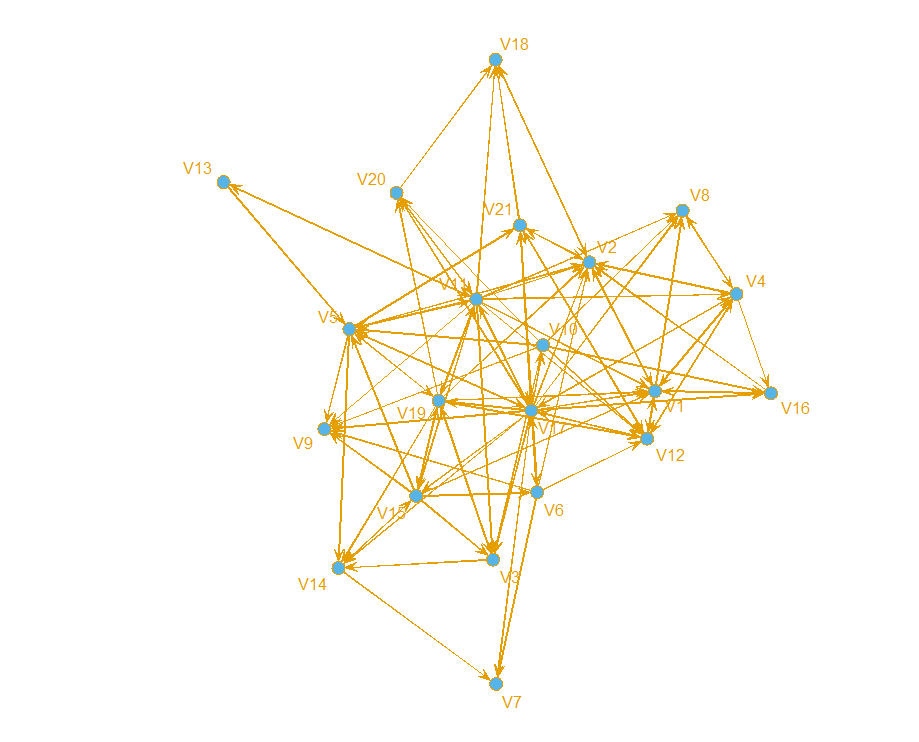

пп5. Сеть была отображена с помощью алгоритмов укладки Фрюхтермана-Рейнгольда и Камада-Каваи.

In [ ]:
lFR <- layout.fruchterman.reingold(friendGr);
lKK <- layout.kamada.kawai(friendGr);
plot(friendGr, layout = lFR, main = "Fruchterman-Reingold graph layout algorithm");
plot(friendGr, layout = lKK, main = "Kamada Kawai graph layout algorithm");

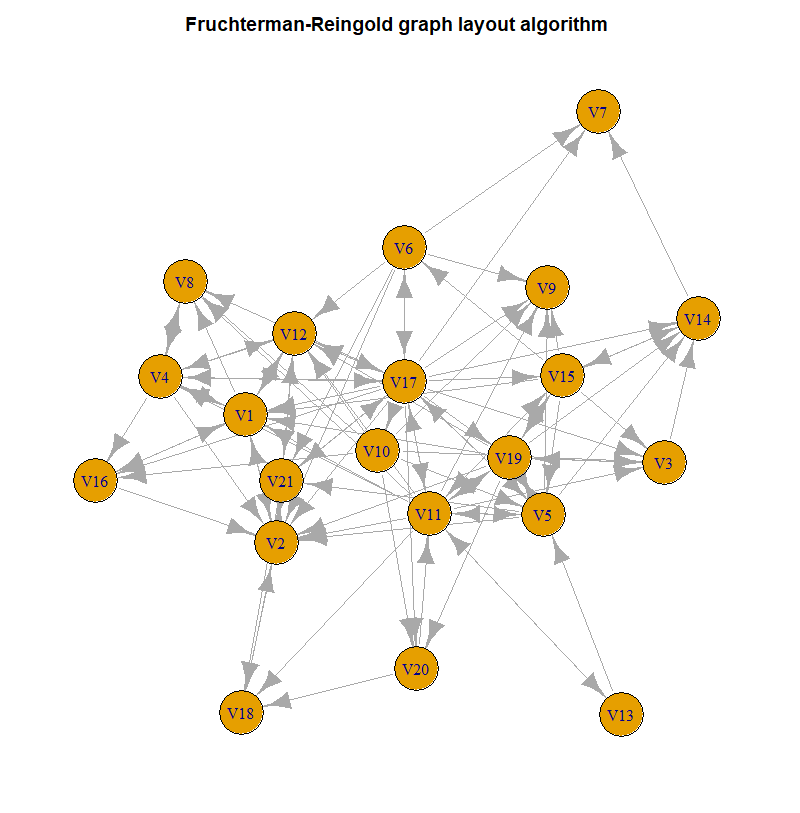
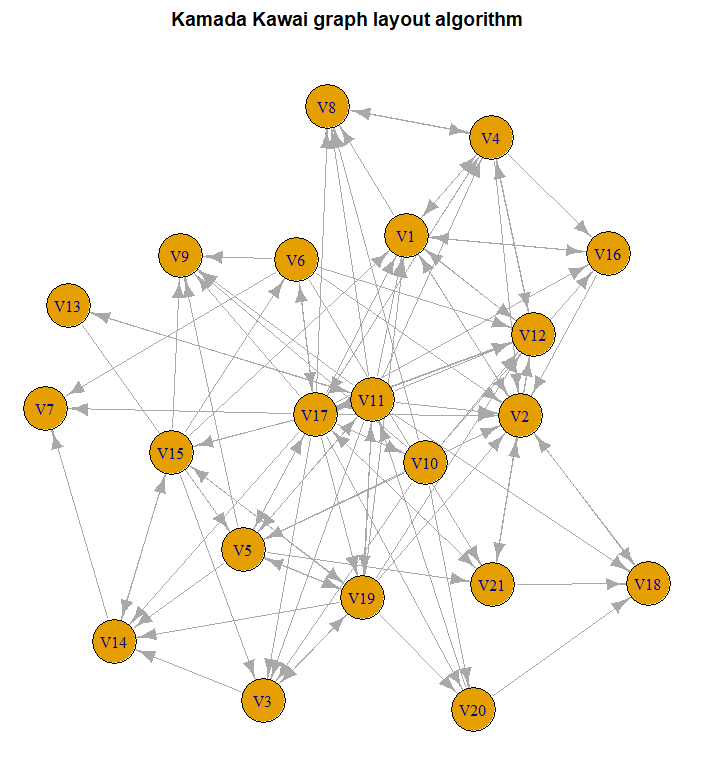

пп6. Была выведена "описательная" сводка сети:

In [ ]:
summary(directNet);

Вывод "описательной" сводки сети:<br>

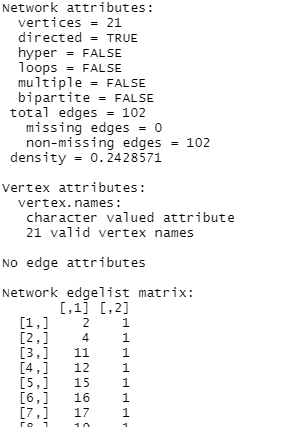

пп7. Далее была вычислена *\"пятичисловая сводка\"* сети: </br>  &emsp;*(a)* ***Размер сети:***&emsp;**21** (количество акторов в сети);</br> 

&emsp;&emsp;&emsp;&nbsp;*(b)* ***Плотность сети*** *для направленной сети по формуле:*<br/>&emsp;&emsp;&emsp;&nbsp;$△ = \dfrac{L}{A_2^g} = \dfrac{L}{g(g-1)}=\dfrac{102}{21*20} \approx 0.2429$ <br/>&emsp;&emsp;&emsp;&nbsp;Вычисленное функцией *gden()* значение: 0.2428571. <br/>&emsp;&emsp;&emsp;&nbsp;**Вывод**. "Теоретическая" плотность сети совпадает с вычисленным функцией *gden()* значением с точностью до округления. Значит, плотность сети вручную посчитана верно: **$\triangle$ $\approx$ 0.2429**.</br> 

&emsp;&emsp;&emsp;&nbsp;*(c)* ***Число компонент в сети*** *по графику*: &emsp;1.<br/>
&emsp;&emsp;&emsp;&nbsp;Вычисленное функцией *components()* значение: &emsp;3.<br/> &emsp;&emsp;&emsp;&nbsp;**Вывод**. Число компонент по графику не совпало со значением, вычисленным функцией *components()*. Поскольку на первый взгляд число компонент в большой направленной сети определить трудно. Функция с такой задачей справляется лучше. **Число компонент - 3**.</br> 

&emsp;&emsp;&emsp;&nbsp;*(d)* ***Диаметр сети*** . <br/>&emsp;&emsp;&emsp;&nbsp;Вычислим матрицу геодезических расстояний с помощью функции *geodist()* и найдем среди ее элементов максимальный, отличный от бесконечности(когда пути нет). Получили **diameter = 5**.<br/>&emsp;&emsp;&emsp;&nbsp;**Вывод**. Таким образом, наибольшее из кратчайших расстояний между всеми парами узлов равно 5.</br> 

&emsp;&emsp;&emsp;&nbsp;*(e)* ***Коэффициент кластеризации***. <br/>&emsp;&emsp;&emsp;&nbsp;Значение, вычисленное функцией *gtrans()*: &emsp;0.4610526<br/>&emsp;&emsp;&emsp;&nbsp;**Вывод.**<br/>&emsp;&emsp;&emsp;&nbsp; Таким образом, коэффициент кластеризации, т.е. отношение закрытых треугольников по отношению к общему  количеству открытых и закрытых треугольников составляет 0.4610526 .

In [ ]:
library(sna);
cat("'Five Number' summary about network:\n");
cat("Network's size: ", network.size(directNet), '\n');
cat("Network's density: ", gden(directNet, mode='graph'), '\n');
cat("Number of network's components: ", components(directNet), '\n');
lst <- geodist(directNet); # geodist returns the list containing counts, gdist, ...
# найдем максимальное из кратчайших путей
diam <- max(lst$gdist[lst$gdist != Inf]);
cat("Network's diameter: ", diam, '\n');
cat("Network's transitivity: ", gtrans(directNet), '\n');

Вывод "пятичисловой" сводки сети:<br>

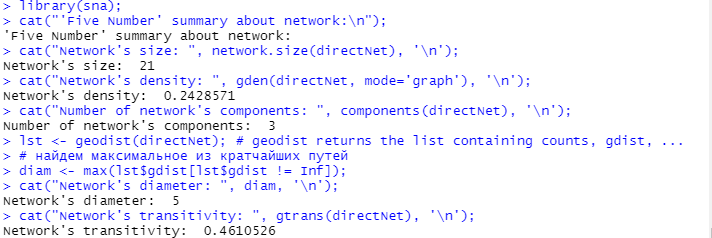

пп8. Была вычислена средняя степень узлов и дисперсия по входящим и исходящим ребрам. <br/>**Вывод**<br/>  С помощью функции *degree()* и параметра *cmode="indegree"/"outdegree"* из пакета *sna* были вычислены степени узлов по входящим и исходящим рёбрам. А также искомые значения: <br/> &emsp;*Средняя степень узлов по входящим ребрам:* &emsp;**4.857143**<br/>&emsp;*Дисперсия степеней узлов по входящим ребрам:*&emsp;**4.693878**<br/> &emsp;*Средняя степень узлов по исходящим ребрам:* &emsp;**4.857143**<br/>&emsp;*Дисперсия степеней узлов по исходящим ребрам:*&emsp;**19.07483**

In [ ]:
dgrs_in <- degree(directNet, gmode='digraph', cmode='indegree');
avg_degree_in <- sum(dgrs_in)/length(dgrs_in);
s_d_in <- sum((dgrs_in-avg_degree_in)^2)/length(dgrs_in);
cat("Network's average indegree: ", avg_degree_in, '\n');
cat("Network's indegree variance: ", s_d_in, '\n\n');

dgrs_out <- degree(directNet, gmode='digraph', cmode='outdegree');
avg_degree_out <- sum(dgrs_out)/length(dgrs_out);
s_d_out <- sum((dgrs_out-avg_degree_out)^2)/length(dgrs_out);
cat("Network's average outdegree: ", avg_degree_out, '\n');
cat("Network's outdegree variance: ", s_d_out, '\n');


Вывод средней степени узлов и дисперсии по входящим и исходящим:<br>

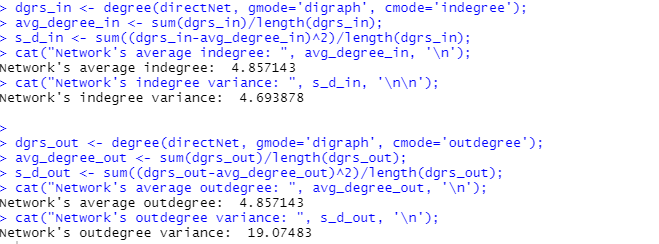

13. Заполненная таблица для различных мер престижа.


In [ ]:
dPrest <- prestige(directNet, gmode="digraph", cmode="indegree")
lst <- geodist(directNet) # geodist возвращает список, включающий в себя: counts(матрица количества кратч.расстояний между каждой парой вершин), gdist(матрица кратч.расстояний), ...
# исключаем строки, из которых нет исходящих связей
gdst <- lst$gdist[which(rowSums(lst$gdist) != Inf), ]
inputActors <- nrow(gdst)
pPrest <- (inputActors^2)/((network.size(directNet)-1)*colSums(gdst))

prestTable <- data.frame(n=network.vertex.names(directNet), Pd=dPrest/(network.size(directNet)-1), Pp=pPrest)
prestTable

| $n_i$ | $P'_{D}$ | $P'_{P}$  |
|-------|----------|-----------|
| V1    | 0.40     | 0.6446429 |
| V2    | 0.50     | 0.6685185 |
| V3    | 0.25     | 0.4750000 |
| V4    | 0.25     | 0.5308824 |
| V5    | 0.30     | 0.4878378 |
| V6    | 0.10     | 0.4011111 |
| V7    | 0.15     | 0.4011111 |
| V8    | 0.25     | 0.5308824 |
| V9    | 0.30     | 0.4512500 |
| V10   | 0.05     | 0.3610000 |
| V11   | 0.30     | 0.4878378 |
| V12   | 0.40     | 0.6016667 |
| V13   | 0.05     | 0.3342593 |
| V14   | 0.25     | 0.4628205 |
| V15   | 0.20     | 0.4512500 |
| V16   | 0.20     | 0.4878378 |
| V17   | 0.30     | 0.5308824 |
| V18   | 0.20     | 0.5157143 |
| V19   | 0.25     | 0.4750000 |
| V20   | 0.15     | 0.4297619 |
| V21   | 0.25     | 0.5157143 |

## Выводы

В результате работы были приобретены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.</br> <br/>
В ходе выполнения работы возникла необходимость более подробного знакомства с  функционалом библиотек igraph, statnet, sna. Для того, чтобы больше узнать о возможностях упомянутых библиотек и использовать подходящие функции в работе, потребовалось изучить соответствующие разделы в документации и подобрать искомые функции и параметры. Полученный опыт и знания также будут актуальны и при написании дальнейших работ.